Aluna: Priscila Graziela Melo Martins

In [19]:
import numpy as np
import random

In [20]:
npop = 100  # tamanho da população
nger = 50 # número de gerações
ndim = 3 # número de dimensões
nprecisao = 6 # precisão
nalelos = ndim * nprecisao #número de alenos no indivíduo
pc = 1.0  # probabilidade de cruzamento
pm = 0.10  # probabilidade de mutação

In [21]:
# A função gera vpop que é o vetor com os npop indivíduos de nalelos bits
def gerar_vetor_binarios(npop, nalelos):
    vpop = []
    for _ in range(npop):
        numero = random.randint(0, 2**nalelos - 1)  # Gera um número inteiro aleatório com até nalelos bits
        binario = bin(numero)[2:].zfill(nalelos)    # Converte o número para binário e preenche com zeros à esquerda
        vpop.append(binario)
    return vpop

In [22]:
# A função dividi cada indivíduo em partes de tamanho nprecisao gerando o genes_ind. genes_ind é ma lista contendo os genes do indivíduo.
def dividir_em_genes(individuo, nprecisao):
    genes_ind = []
    for i in range(0, len(individuo), nprecisao ):
        gene = individuo[i:i+nprecisao]
        genes_ind.append(gene)
    return genes_ind

In [23]:
# A função que converte os genes binários em inteiros.
def binario_para_inteiro(genes_ind):
    inteiros_gene = []
    for gene in genes_ind:
        inteiro = int(gene, 2)
        inteiros_gene.append(inteiro)
    return inteiros_gene

In [24]:
# A função discretiza os inteiros_gene no intervalo de xmin a xmax tendo 2**nprecisao posibilidades de valores.
def discretizacao(inteiros_gene, nprecisao):
    xmin = -2
    xmax = 2
    discrets_gene =[]
    for inteiro in inteiros_gene:
        x = xmin + ((xmax-xmin)/((2**nprecisao) -1)*inteiro) # Fórmula para converter o número inteiro para um valor discretizado
        discrets_gene.append(x)
    return discrets_gene

In [25]:
# A função calcula o valor da função objetivo para um vetor x de dimensão n. x é o indivíduo dividido em genes discretizados.
def funcao_objetivo(x, n):
    soma1 = sum(xi ** 2 for xi in x)
    soma2 = sum(np.cos(2 * np.pi * xi) for xi in x)
    resultado = -20 * np.exp(-0.2 * np.sqrt(1/n * soma1)) - np.exp(1/n * soma2) + 20 + np.e
    return resultado

In [26]:
# A função implementa o método de seleção por torneio. pop é a lista de indivíduos da população, vfitness á a lista contendo
# os valores de fitness correspondentes a cada indivíduo na população e nselecionados é o número de indivíduos a serem selecionados em cada torneio.
# Essa função retorna vpais que é uma lista contendo os indivíduos selecionados como pais após os torneios.
def torneio(pop, vfitness, nselecionados):
  vpais = []
  for i in range(len(pop)):
      indices = random.sample(range(len(pop)), nselecionados)  # Seleciona aleatoriamente nselecionados números sem substituição.
      menor_valor_fitness = float('inf')  # Inicializa o menor valor de fit com infinito positivo
      melhor_indice = None
      for indice in indices:
          if vfitness[indice] < menor_valor_fitness:
              menor_valor_fitness = vfitness[indice]  # Atualiza o menor valor de fitness encontrado
              melhor_indice = indice  # Atualiza o índice do melhor indivíduo encontrado
      pais = pop[melhor_indice] # Obtém o indivíduo correspondente ao melhor índice encontrado
      vpais.append(pais)
  return vpais

In [27]:
# A função realiza o cruzamento em uma lista de população de indivíduos (vpais) e retorna uma lista contendo os filhos (vfilhos)
#resultantes do cruzamento. A partir do ponto de corte, dois pais se misturam (trocam a porção de alelos) para formar dois filhos.
def cruzamento(vpais):
  vfilhos =[]
  for i in range(0, len(vpais), 2 ):
      divisao = random.randint (1, nalelos-1)  # Seleciona aleatoriamente um ponto de corte para realizar o cruzamento
      filho1 = vpais[i][:divisao] + vpais[i+1][divisao:]
      filho2 = vpais[i+1][:divisao] + vpais[i][divisao:]
      vfilhos.append(filho1)
      vfilhos.append(filho2)
  return vfilhos

In [28]:
# A função realiza a mutação em uma população de indivíduos (vfilhos) e retorna a nova população após a aplicação da mutação.
def mutacao(vfilhos):
    nova_vfilhos = []
    for individuo in vfilhos:
        novo_individuo = ''
        for bit in individuo:
            valor_aleatorio = random.random() # Gera um valor aleatório entre 0 e 1
            if valor_aleatorio <= pm: # Verifica se o valor aleatório está abaixo ou igual à probabilidade de mutação (pm)
                novo_bit = '0' if bit == '1' else '1' # Se sim, realiza a mutação trocando o bit para 0 se for 1, e vice-versa
            else:
                novo_bit = bit # Se não, mantém o bit inalterado
            novo_individuo += novo_bit
        nova_vfilhos.append(novo_individuo)
    return nova_vfilhos

In [29]:
# A função implementa uma estratégia de elitismo na qual o indivíduo com melhor fitness é selecionada para a próxima geração.
def elitismo (vfitness, pop, nova_vfilhos):
    menor_valor_fitness = min(vfitness)  # Encontra o menor valor de fitness na população atual
    indice_menor_valor = vfitness.index(min(vfitness))  # Encontra o índice do menor valor de aptidão
    indice = random.randint (0,len(pop)-1) # Escolhe aleatoriamente um índice
    nova_vfilhos[indice]  = pop[indice_menor_valor] # Substitui o indivíduo no índice escolhido da nova população pelo melhor indivíduo da geração anterior
    return nova_vfilhos

In [39]:
# Código executa um loop que representa uma única execução do algoritmo genético. A cada iteração do loop, uma nova geração é criada e avaliada,
# e o processo é repetido até que o número máximo de gerações seja atingido.
pop = gerar_vetor_binarios(npop, nalelos)[:]  # ou .copy
vfitness_geracao =[]
ntorneio = 3
i = 0
while i < nger:
    vfitness = []
    for individuo in pop:
        gene_ind = dividir_em_genes(individuo, nprecisao)
        int_gene = binario_para_inteiro(gene_ind)
        dis_gene = discretizacao(int_gene, nprecisao)
        fobj = funcao_objetivo(dis_gene, ndim)
        vfitness.append(fobj)
    vpais = torneio(pop, vfitness, ntorneio)
    vfilhos = cruzamento(vpais)
    vfilhos_new = mutacao(vfilhos)
    pop  = elitismo (vfitness, pop, vfilhos_new)
    valor_fitness = min(vfitness)
    vfitness_geracao.append(valor_fitness)
    print("Fitness=", valor_fitness, "para a geração", i)
    i += 1

Fitness= 2.484443653233136 para a geração 0
Fitness= 2.16977440811062 para a geração 1
Fitness= 1.5829805179452703 para a geração 2
Fitness= 0.7924345005622908 para a geração 3
Fitness= 0.7924345005622908 para a geração 4
Fitness= 0.7924345005622908 para a geração 5
Fitness= 0.42834112128815294 para a geração 6
Fitness= 0.42834112128815294 para a geração 7
Fitness= 0.42834112128815294 para a geração 8
Fitness= 0.42834112128815294 para a geração 9
Fitness= 0.42834112128815294 para a geração 10
Fitness= 0.42834112128815294 para a geração 11
Fitness= 0.42834112128815294 para a geração 12
Fitness= 0.42834112128815294 para a geração 13
Fitness= 0.42834112128815294 para a geração 14
Fitness= 0.42834112128815294 para a geração 15
Fitness= 0.42834112128815294 para a geração 16
Fitness= 0.42834112128815294 para a geração 17
Fitness= 0.42834112128815294 para a geração 18
Fitness= 0.42834112128815294 para a geração 19
Fitness= 0.42834112128815294 para a geração 20
Fitness= 0.42834112128815294 par

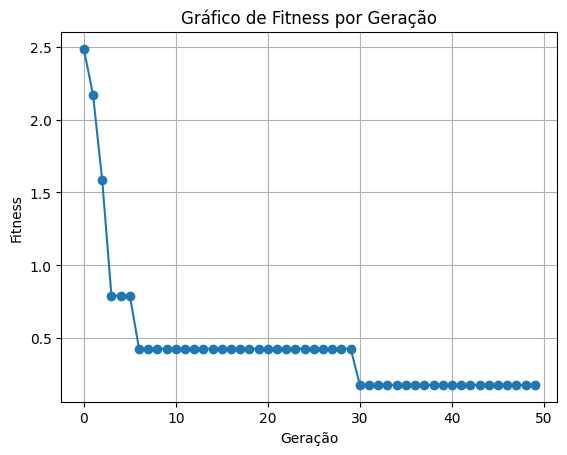

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(len(vfitness_geracao)), vfitness_geracao, marker='o', linestyle='-')
plt.title('Gráfico de Fitness por Geração')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()

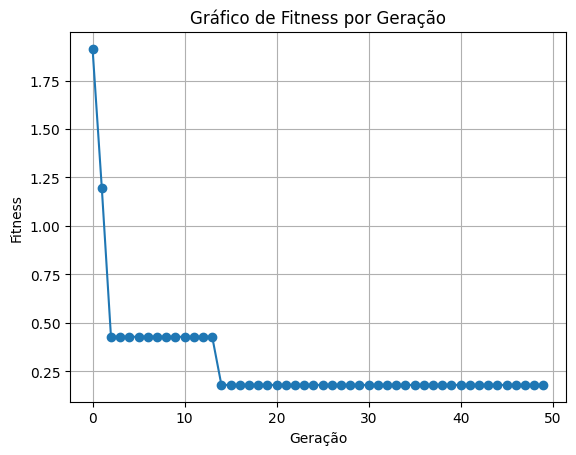